<a href="https://www.kaggle.com/code/shauntingck/pagetimings?scriptVersionId=130930581" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Packages

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from pandas import DataFrame, concat

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/PageTimings.xlsx


# Importing File

In [2]:
import warnings

# Filter out UserWarnings
warnings.filterwarnings("ignore", category=UserWarning)

file_path = r'/kaggle/input/dataset/PageTimings.xlsx'
xls = pd.ExcelFile(file_path)
xls.sheet_names

# Dataset 1
df1 = pd.read_excel(file_path, sheet_name="Dataset1")

# Dataset 2
df2 = pd.read_excel(file_path, sheet_name="Dataset2")


# Dataset 1

### Clean

In [3]:
# Remove the first 10 rows from df1_total
df1_total = df1.drop(df1.index[0:10])

# Remove the sum row from df1
df1 = df1.drop(df1.index[10:11])

### Preliminary Analysis

In [4]:
df1.describe()

,Avg. Page Load Time (sec),Pageviews,Bounce Rate,% Exit,Page Value
count,10.000000,10.00000,10.000000,10.000000,10.0
mean,2.030917,163.90000,0.489903,0.363617,0.0
std,2.862993,159.58728,0.274622,0.242436,0.0
min,0.000000,49.00000,0.000000,0.049180,0.0
25%,0.000000,55.50000,0.295806,0.193662,0.0
50%,0.000000,82.00000,0.513158,0.297151,0.0
75%,3.701917,229.50000,0.672009,0.472610,0.0
max,7.635000,474.00000,0.857143,0.792453,0.0


### Charts

Text(0.5, 1.0, 'Average page load time of Different pages')

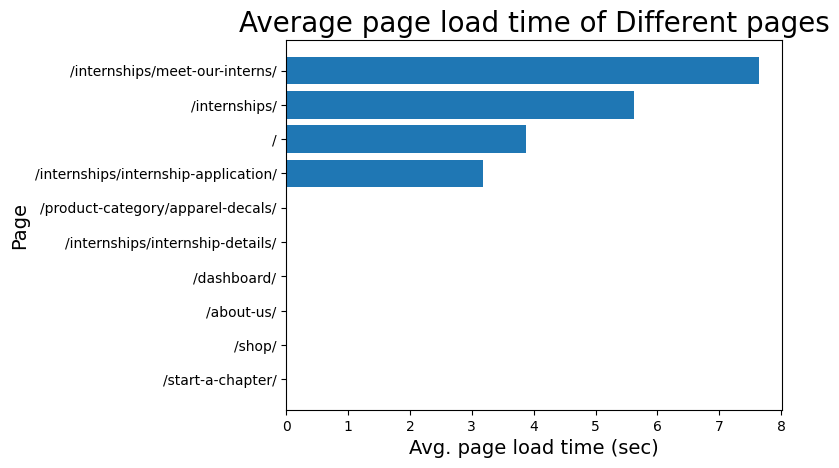

In [5]:
# Sort the DataFrame df1 by 'Avg. Page Load Time (sec)' column in ascending order
df1_AvgPage = df1.sort_values(by='Avg. Page Load Time (sec)', ascending=True)

# Create a horizontal bar plot with 'Page' and 'Avg. Page Load Time (sec)' 
plt.barh(df1_AvgPage['Page'], df1_AvgPage['Avg. Page Load Time (sec)'])
plt.ylabel('Page',fontsize = '14')
plt.xlabel('Avg. page load time (sec)',fontsize = '14')
plt.title('Average page load time of Different pages', fontsize = '20')

Text(0.5, 1.0, 'Pageviews of Different pages')

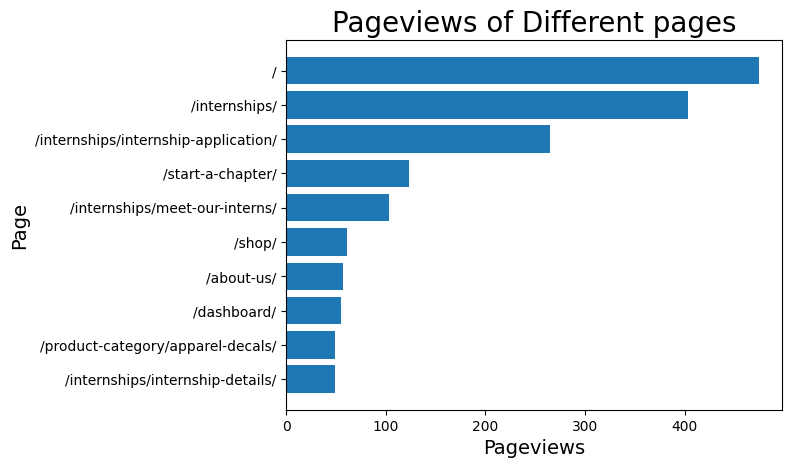

In [6]:
# Sort the DataFrame df1 by 'Pageviews' column in ascending order
df1_Pageviews = df1.sort_values(by='Pageviews', ascending=True)

# Create a horizontal bar plot with 'Page' and 'Pageviews' 
plt.barh(df1_Pageviews['Page'], df1_Pageviews['Pageviews'])
plt.ylabel('Page',fontsize = '14')
plt.xlabel('Pageviews',fontsize = '14')
plt.title('Pageviews of Different pages', fontsize = '20')

Text(0.5, 1.0, 'Bounce rate of Different pages')

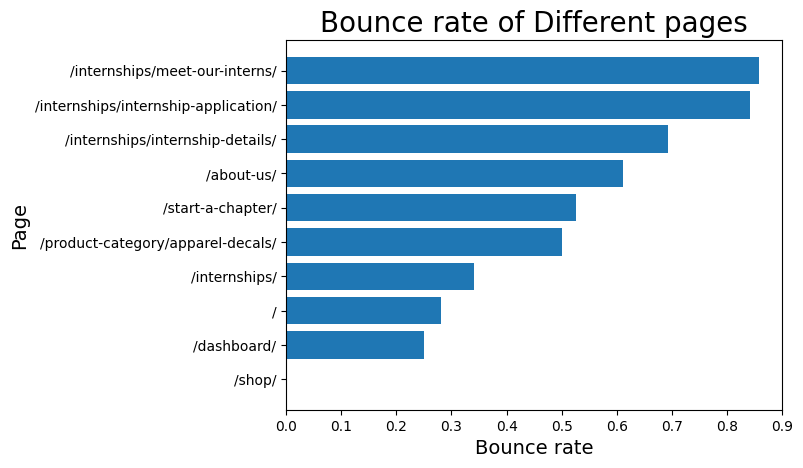

In [7]:
# Sort the DataFrame df1 by 'Bounce Rate' column in ascending order
df1_BounceRate = df1.sort_values(by='Bounce Rate', ascending=True)

# Create a horizontal bar plot with 'Page' and 'Bounce Rate' 
plt.barh(df1_BounceRate['Page'], df1_BounceRate['Bounce Rate'])
plt.ylabel('Page',fontsize = '14')
plt.xlabel('Bounce rate',fontsize = '14')
plt.title('Bounce rate of Different pages', fontsize = '20')

Text(0.5, 1.0, 'Percentage exit of Different pages')

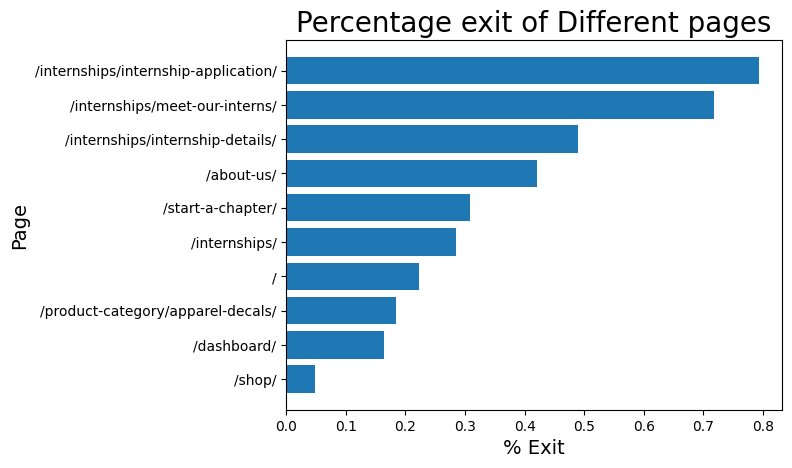

In [8]:
# Sort the DataFrame df1 by '% Exit' column in ascending order
df1_Exit = df1.sort_values(by='% Exit', ascending=True)

# Create a horizontal bar plot with 'Page' and '% Exit' 
plt.barh(df1_Exit['Page'], df1_Exit['% Exit'])
plt.ylabel('Page',fontsize = '14')
plt.xlabel('% Exit',fontsize = '14')
plt.title('Percentage exit of Different pages', fontsize = '20')

# Dataset 2

### Clean

In [9]:
df2 = df2.drop(df2.index[7:9])
df2

,Day Index,Avg. Page Load Time (sec)
0,2023-05-07,0.00000
1,2023-05-08,4.66420
2,2023-05-09,3.38800
3,2023-05-10,3.87800
4,2023-05-11,0.00000
5,2023-05-12,0.00000
6,2023-05-13,5.84475


### Preliminary Analysis

In [10]:
df2.describe()

,Avg. Page Load Time (sec)
count,7.000000
mean,2.539279
std,2.493249
min,0.000000
25%,0.000000
50%,3.388000
75%,4.271100
max,5.844750


### Chart

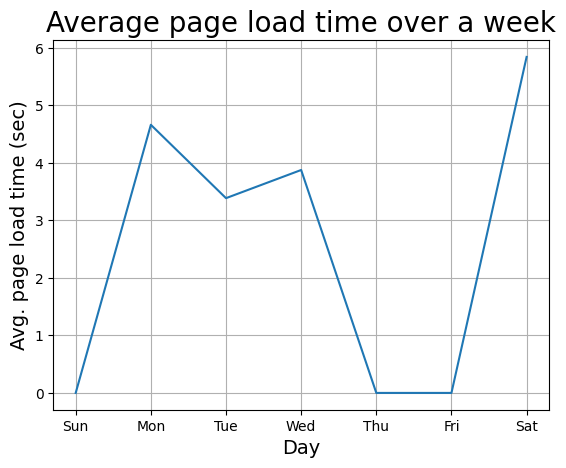

In [11]:
# Format the 'Day' column as abbreviated day names
day_labels = df2['Day Index'].dt.strftime('%a')

plt.plot(day_labels, df2['Avg. Page Load Time (sec)'])
plt.xlabel('Day', fontsize='14')
plt.ylabel('Avg. page load time (sec)', fontsize='14')
plt.title('Average page load time over a week', fontsize='20')
plt.grid(True)

plt.show()